FFHS DAS Data Science  
Semesterarbeit FS20  
Iwan Imsand

Statistische Datenanalyse, StatDa  
**Nach der ersten Präsenz**

# Deskriptive Analyse

In diesem Kapitel wird eine deskriptive Analyse für den gewählten Datensatz durchgeführt.

## Zusammenfassung

**<font color='red'>TODO</font>**

# Daten

## Quelle der Rohdaten

Folgende Quellen wurden benutzt:

* **[CitiBike NYC](https://www.citibikenyc.com/)**
   * Beschreibung: [CitiBike NYC System Data](https://www.citibikenyc.com/system-data)
   * Rohdaten: [tripdata](https://s3.amazonaws.com/tripdata/index.html)
   * Bemerkung: Daten sind frei verfügubar
* **[OpenWeather](https://openweathermap.org/)** (gekaufte Daten)
   * Beschreibung: [Weather parameters in History Bulk](https://openweathermap.org/history-bulk#parameter)
   * Rohdaten: [History Bulk](https://openweathermap.org/history-bulk)
   * Bemerkung: Daten für New York wurden für 10$ gekauft
   
Die Datenbeschaffung, Bereinigung und Zusammenführung wurde in den Notebooks ```0_*.ipynb``` durchgeführt.

## Daten für die Analysen

**Als Grundlage für alle nachfolgenden Analysen, dienen die folgenden Daten**:

| Dateiname                                                                            | Beschreibung
| ------------------------------------------------------------------------------------ | -------------
| **```samples_5000_201910-citibike-tripweather-data.parquet```**                      | Enthält 5000 zufällig gewählte Stichproben aus dem Monat Oktober des Jahres 2019.
| **```summary-daily-subscribers_only-citibike-tripweather.parquet```**                | Enthält eine aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!
| **```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```** | Enthält eine nach Geschlecht gruppierte und aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!

Alle Dateien befinden sich im Pfad ```./../data/citibike/tripdata/```.

In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
pd.options.display.float_format = '{:.5f}'.format

In [6]:
path = './../data/citibike/tripdata'

# Analyse ```samples_5000_201910-citibike-tripweather-data.parquet```

## Merkmale

In [7]:
df_oct2019 = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

In [8]:
df_oct2019.head().T

,811188,623554,1722948,1493393,909432
dt_utc,2019-10-12 16:20:30+00:00,2019-10-10 01:07:17+00:00,2019-10-25 21:17:12+00:00,2019-10-22 21:36:53+00:00,2019-10-13 20:59:23+00:00
Trip Duration,357,299,552,220,2063
Start Time,2019-10-12 12:20:30-04:00,2019-10-09 21:07:17-04:00,2019-10-25 17:17:12-04:00,2019-10-22 17:36:53-04:00,2019-10-13 16:59:23-04:00
Stop Time,2019-10-12 12:26:27-04:00,2019-10-09 21:12:16-04:00,2019-10-25 17:26:25-04:00,2019-10-22 17:40:34-04:00,2019-10-13 17:33:46-04:00
Start Station ID,3411,3102,3233,296,3777
Start Station Name,Bond St & Bergen St,Driggs Ave & Lorimer St,E 48 St & 5 Ave,Division St & Bowery,Stockholm St & Wilson Ave
Start Station Latitude,40.68497,40.72179,40.75725,40.71413,40.69930
Start Station Longitude,-73.98621,-73.95042,-73.97806,-73.99705,-73.92304
End Station ID,83,3094,486,307,3346
End Station Name,Atlantic Ave & Fort Greene Pl,Graham Ave & Withers St,Broadway & W 29 St,Canal St & Rutgers St,Berkeley Pl & 7 Ave


Die Merkmale die in der Datei ```samples_5000_201910-citibike-tripweather-data.parquet``` enthalten sind, werden in folgender Tabelle beschrieben.

| Statistische Einheit | Merkmal                     | Merkmalsausprägung / Beispiel | Skalenniveau   | Kontinuität | Beschreibung
| -------------------- | --------------------------- | ----------------------------- | -------------- | ----------- | -------------
| Trip                 | **dt_utc**                  | 2019-10-01 400:00:05+00:00    | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde in 'Koordinierter Weltzeit' (UTC)
| Trip                 | **Trip Duration**           | 100 Sekunden                  | **Verhältnis** | stetig      | Dauer des Trips in Sekunden
| Trip                 | **Start Time**              | 2019-01-01 00:01:05-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde mit Zeitzone US/Eastern
| Trip                 | **Stop Time**               | 2019-01-01 00:07:07-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip beendet wurde mit Zeitzone US/Eastern
| Trip                 | **Linear Distance**         | 1.55503                       | **Verhältnis** | stetig      | Distanz der Luftlinie zwischen Start und Stop Station in km (Berechnet mit _haversine_)
| Station              | **Start Station ID**        | 3160                          | **Nominal**    | diskret     | Eindeutige Identifikation der Station an welcher der Trip gestartet wurde
| Station              | **Start Station Name**      | Central Park West & W 76 St   | **Nominal**    | diskret     | Name der Startstation
| Station              | **Start Station Latitude**  | 40.778968                     | **Intervall**  | stetig      | Breitengrad der Startstation
| Station              | **Start Station Longitude** | -73.973747                    | **Intervall**  | stetig      | Längengrad der Startstation
| Station              | **End Station ID**          | 3283                          | **Nominal**    | diskret     | Eindeutige Identifikation der der Station an welcher der Trip beendet wurde
| Station              | **End Station Name**        | W 89 St & Columbus Ave        | **Nominal**    | diskret     | Name der Endstation
| Station              | **End Station Latitude**    | 40.788221                     | **Intervall**  | stetig      | Breitengrad der Endstation
| Station              | **End Station Longitude**   | -74.00597                     | **Intervall**  | stetig      | Längengrad der Endstation
| Bike                 | **Bike ID**                 | 15839                         | **Nominal**    | diskret     | Eindeutige Identifikation des Bikes
| User                 | **User Type**               | Subscriber                    | **Nominal**    | diskret     | Benutzertyp: ```Customers```=_24-hour pass_ oder _3-day pass_; ```Subscribers```=_Annual Member_
| User                 | **Birth Year**              | 1971                          | **Intervall**  | diskret     | Geburtsjahr des Benutzers
| User                 | **Gender**                  | 1                             | **Nominal**    | diskret     | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_
| User                 | **Age 2020**                | 28                            | **Verhältnis** | diskret     | Alter des Benutzers im Jahr 2020 in Jahren
| Temperature          | **temp**                    | 17.52                         | **Intervall**  | stetig      | Temperatur in Grad Celsius
| Air                  | **pressure**                | 1023                          | **Intervall**  | stetig      | Luftdruck (auf Meereshöhe), hPa
| Air                  | **humidity**                | 75                            | **Intervall**  | stetig      | Luftfeuchtigkeit in %
| Wind                 | **wind_speed**              | 5.27                          | **Verhältnis** | stetig      | Windgeschwindigkeit in m/s
| Rainfall             | **rain_1h**                 | 0.25                          | **Verhältnis** | stetig      | Regenmenge der letzten Stunde in mm
| Snowfall             | **snow_1h**                 | 0.00                          | **Verhältnis** | stetig      | Schneemenge der letzten Stunde in mm
| Clouds               | **clouds_all**              | 100                           | **Intervall**  | stetig      | Bewölkung in %
| Weather              | **weather_id**              | 500                           | **Nominal**    | diskret     | Code für die Wetterbedingung (Aufgelistet unter https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_main**            | Rain                          | **Nominal**    | diskret     | Gruppe der Wetterbedingung (z.B. ```Rain```,```Clear```,```Clouds```, für weitere: https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_description**     | light rain                    | **Nominal**    | diskret     | Beschreibung der Wetterbedingung (z.B. ```light rain```, ```sky is clear```, ```few clouds```, für weitere https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)


## Trip

Untersuchungen zum Trip.

In [199]:
df_trip = pd.DataFrame(
    data={
        'Trip Duration (sec)': df_oct2019['Trip Duration'].values,
        'Trip Duration (min)': df_oct2019['Trip Duration'].values / 60,
        'Trip Duration (h)': df_oct2019['Trip Duration'].values / 60 / 60,
        'Trip Duration (d)': df_oct2019['Trip Duration'].values / 60 / 60 / 24,
        'Linear Distance (m)': df_oct2019['Linear Distance'].values * 1000,
        'Linear Distance (km)': df_oct2019['Linear Distance'].values
    }
)
df_trip.describe()

,Trip Duration (sec),Trip Duration (min),Trip Duration (h),Trip Duration (d),Linear Distance (m),Linear Distance (km)
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,922.72860,15.37881,0.25631,0.01068,1753.02708,1.75303
std,5575.16818,92.91947,1.54866,0.06453,1368.16795,1.36817
min,65.00000,1.08333,0.01806,0.00075,0.00000,0.00000
25%,362.00000,6.03333,0.10056,0.00419,836.58961,0.83659
50%,606.00000,10.10000,0.16833,0.00701,1349.02670,1.34903
75%,1021.25000,17.02083,0.28368,0.01182,2242.74939,2.24275
max,377055.00000,6284.25000,104.73750,4.36406,11320.95738,11.32096


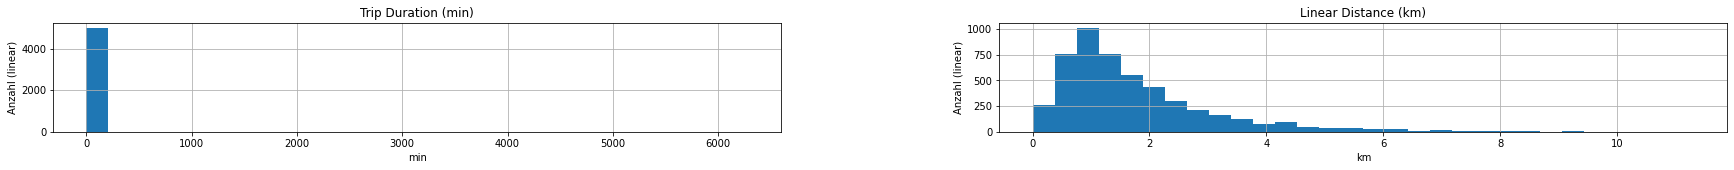

In [317]:
fig = plt.figure(figsize=(30, 2))

ax1 = plt.subplot(1, 2, 1)
_ = df_trip.hist(ax=ax1, column=['Trip Duration (min)'], figsize=(30,2), bins=30, log=False)
ax1.set_xlabel('min')
ax1.set_ylabel('Anzahl (linear)')

ax2 = plt.subplot(1, 2, 2)
_ = df_trip.hist(ax=ax2, column=['Linear Distance (km)'], figsize=(30,2), bins=30, log=False)
ax2.set_xlabel('km')
ax2.set_ylabel('Anzahl (linear)')

plt.show()

Es ist ersichtlich, dass bei bei Trip Duration die Werte ziemlich nahe bei null sind. Bei Linear Distance gibt es ab 6 Kilomenter fast keine Werte mehr. Damit die Werte ab 50'0000 Sekunden auch ersichtlich werden, wird das Histogramm noch mit logarithmischer y-Achse erstellt.

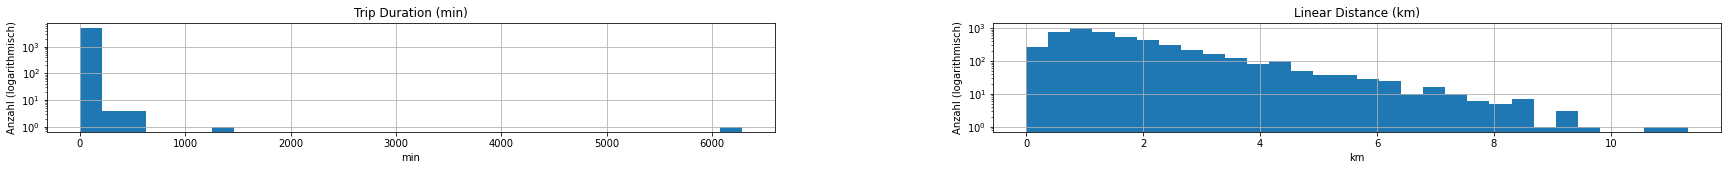

In [316]:
fig = plt.figure(figsize=(30, 2))

ax1 = plt.subplot(1, 2, 1)
_ = df_trip.hist(ax=ax1, column=['Trip Duration (min)'], figsize=(30,2), bins=30, log=True)
ax1.set_xlabel('min')
ax1.set_ylabel('Anzahl (logarithmisch)')

ax2 = plt.subplot(1, 2, 2)
_ = df_trip.hist(ax=ax2, column=['Linear Distance (km)'], figsize=(30,2), bins=30, log=True)
ax2.set_xlabel('km')
ax2.set_ylabel('Anzahl (logarithmisch)')

plt.show()

### Trip Duration

In diesem Kapitel wird Trip Duration näher untersucht.

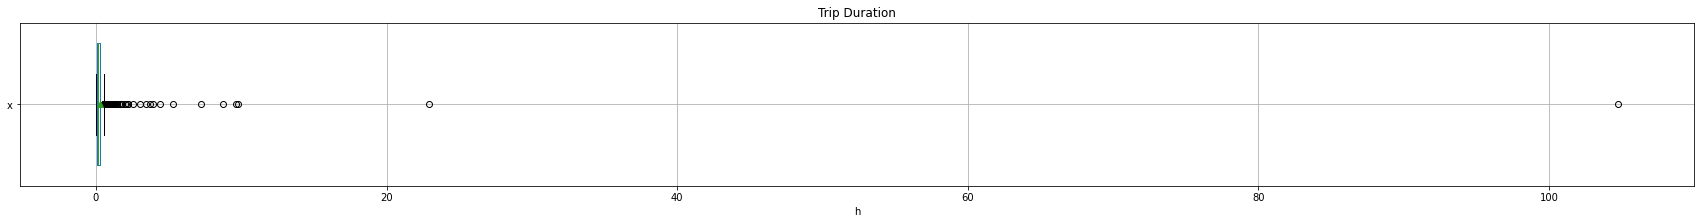

In [320]:
ax = pd.DataFrame.boxplot(df_trip['Trip Duration (h)'], figsize=(30, 3), widths=0.75, vert=False, showmeans=True)
ax.set_xlabel('h')
ax.set_title('Trip Duration')
plt.show()

In dem Boxplot ist nicht viel ersichtlich da alle Werte nahe 0 liegen. Daher werden ab hier nur noch Trips berücksichtigt die kürzer als 6 Stunden sind.

In [206]:
df_trip_under_6h = df_trip[df_trip['Trip Duration (h)'] < 6][[col for col in df_trip.columns if col.startswith('Trip Duration')]]
df_trip_under_6h.describe(percentiles=[0.05, .25, .5, .75, .95])

,Trip Duration (sec),Trip Duration (min),Trip Duration (h),Trip Duration (d)
count,4994.00000,4994.00000,4994.00000,4994.00000
mean,806.28074,13.43801,0.22397,0.00933
std,811.20106,13.52002,0.22533,0.00939
min,65.00000,1.08333,0.01806,0.00075
5%,182.65000,3.04417,0.05074,0.00211
25%,362.00000,6.03333,0.10056,0.00419
50%,605.00000,10.08333,0.16806,0.00700
75%,1020.00000,17.00000,0.28333,0.01181
95%,1974.05000,32.90083,0.54835,0.02285
max,19173.00000,319.55000,5.32583,0.22191


Betreffend Trip Duration sind hier folgende Zahlen erwähnenswert:
* Der Median der Tripdauer liegt bei 10.1 Minuten.
* Ein Trip dauerte durchschnittlich 13.5 Minuten.
* Der längste Trip dauerte 5.3h und der kürzeste 1.1 Minuten.
* 5% der Trips dauerten mehr als 32.9 Minuten und 5% der Trips weniger als 3 Minuten.

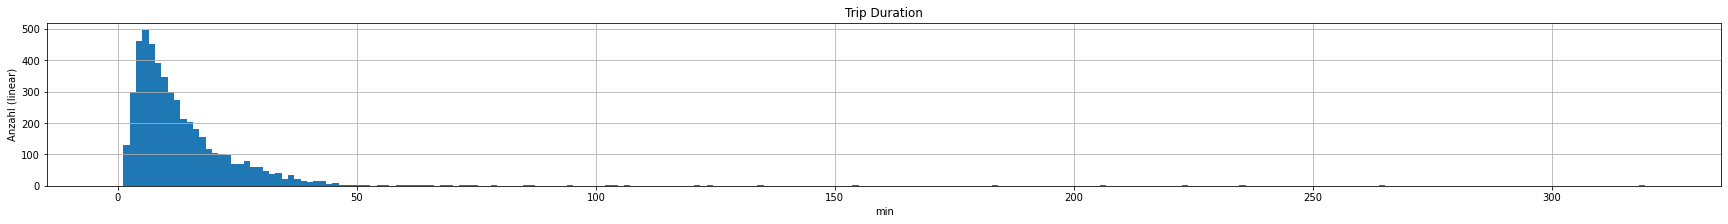

In [324]:
ax = (df_trip_under_6h['Trip Duration (min)']).hist(figsize=(30, 3), bins=240, log=False)
ax.set_xlabel('min')
ax.set_ylabel('Anzahl (linear)')
ax.set_title('Trip Duration')
plt.show()

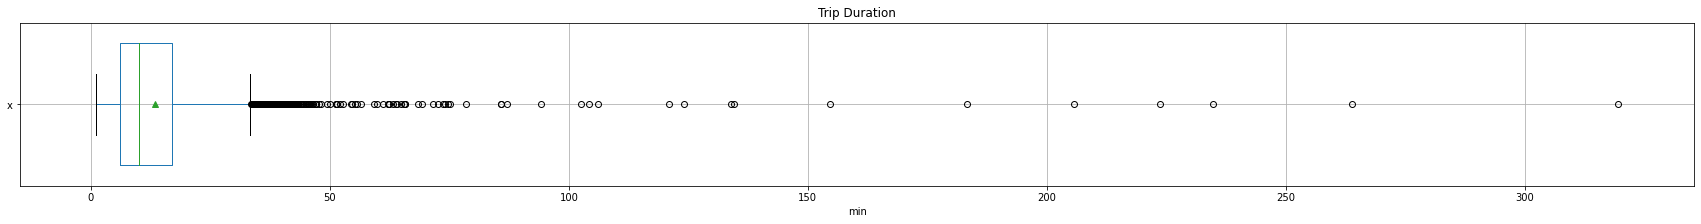

In [333]:
ax = pd.DataFrame.boxplot(df_trip_under_6h['Trip Duration (min)'], figsize=(30, 3), widths=0.75, vert=False, showmeans=True)
ax.set_xlabel('min')
ax.set_title('Trip Duration')
plt.show()

Das Histogramm und der Boxplot zeigen klar das die Trips eher eine kurze Dauer vorweisen und Trips über 50 Minuten eine grosse Ausnahme darstellen.

#### Trip Duration und User Type / Gender

Um einen besseren Vergleich machen zu können, werden ab hier nur noch Trips die weniger als 1h gedauert haben, berücksichtigt.

In [295]:
df_oct2019_under_1h = df_oct2019[(df_trip['Trip Duration (h)'].values < 1)]
df_oct2019_under_1h.insert(loc=2, column='Trip Duration (min)', value=df_oct2019_under_1h['Trip Duration'] / 60)

In [340]:
durations_data = [
    df_oct2019_under_1h[df_oct2019_under_1h['User Type'] == 'Customer']['Trip Duration (min)'],
    df_oct2019_under_1h[df_oct2019_under_1h['User Type'] == 'Subscriber']['Trip Duration (min)'],
    df_oct2019_under_1h[df_oct2019_under_1h['Gender'] == '0']['Trip Duration (min)'],
    df_oct2019_under_1h[df_oct2019_under_1h['Gender'] == '1']['Trip Duration (min)'],
    df_oct2019_under_1h[df_oct2019_under_1h['Gender'] == '2']['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Customer') & (df_oct2019_under_1h['Gender'] == '0')]['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Customer') & (df_oct2019_under_1h['Gender'] == '1')]['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Customer') & (df_oct2019_under_1h['Gender'] == '2')]['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Subscriber') & (df_oct2019_under_1h['Gender'] == '0')]['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Subscriber') & (df_oct2019_under_1h['Gender'] == '1')]['Trip Duration (min)'],
    df_oct2019_under_1h[(df_oct2019_under_1h['User Type'] == 'Subscriber') & (df_oct2019_under_1h['Gender'] == '2')]['Trip Duration (min)'],
]
durations_labels = [
    'Customers',
    'Subscribers',
    'Gender Unknown',
    'Male',
    'Women',
    'Customers & Gender Unknown',
    'Customers & Male',
    'Customers & Woman',
    'Subscribers & Gender Unknown',
    'Subscribers & Male',
    'Subscribers & Woman',
]

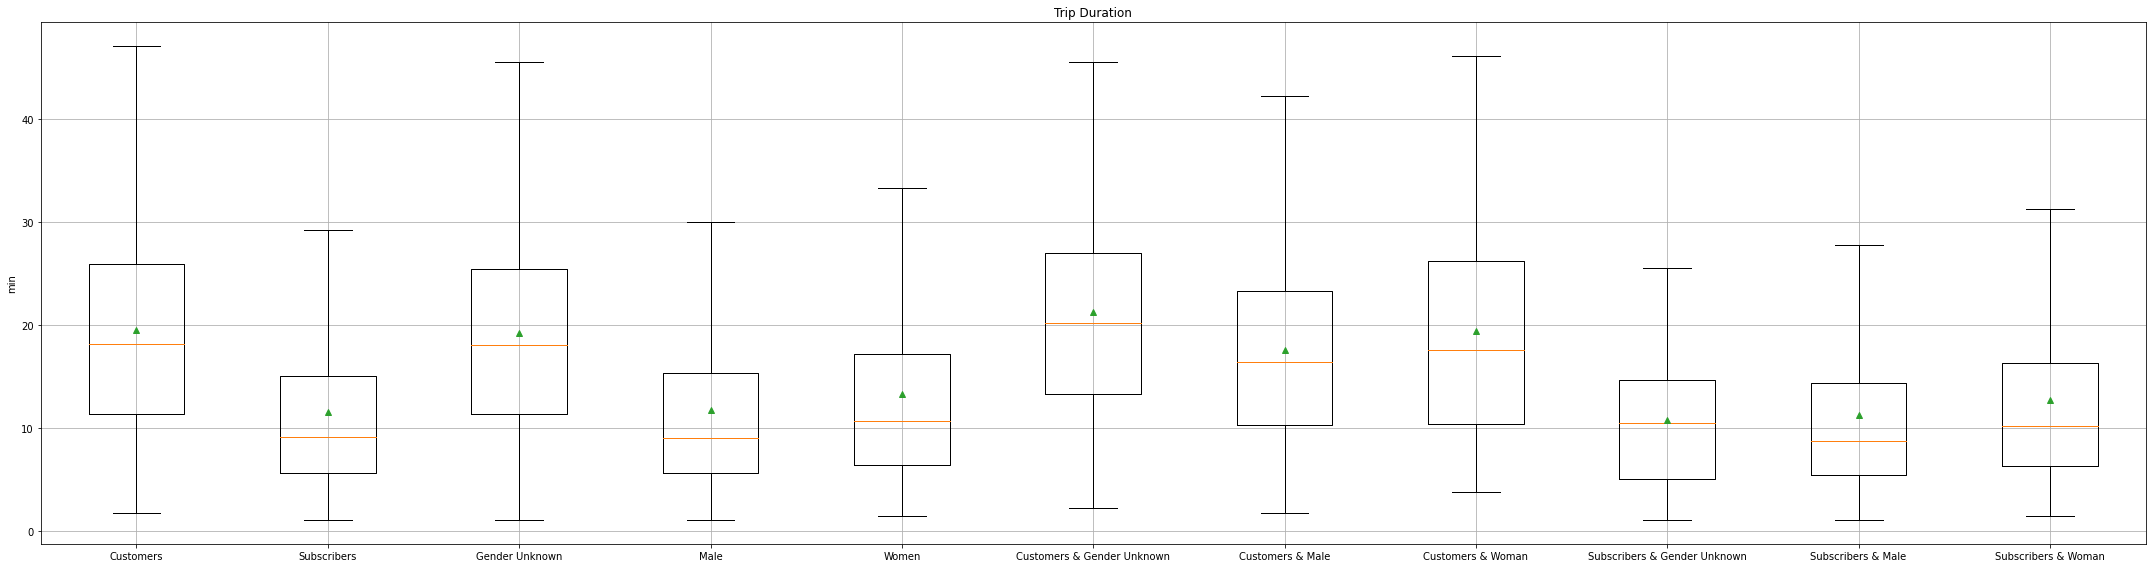

In [342]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.boxplot(durations_data, vert=True, showmeans=True, labels=durations_labels, showfliers=False)
ax.set_ylabel('min')
ax.set_title('Trip Duration')
plt.grid(b=True)
plt.tight_layout()
plt.show()

Im obigen Boxplot werden die verschiedenen Gruppen miteinander verglichen. Folgendes fällt hier auf:
* Trips von Customern dauern länger als solche von Subscribern.
* Die Frauen nutzen die Bikes länger als die Männer. Benutzer die kein Geschlecht angeben, fahren länger als solche die ihr Geschlecht angeben.
* Bei den Subscribern ist mit Berücksichtigung des Geschlechts kein grosser Unterschied zu sehen und die durchschnittliche Dauer der Fahrten liegt nahe beieinander.

## Station

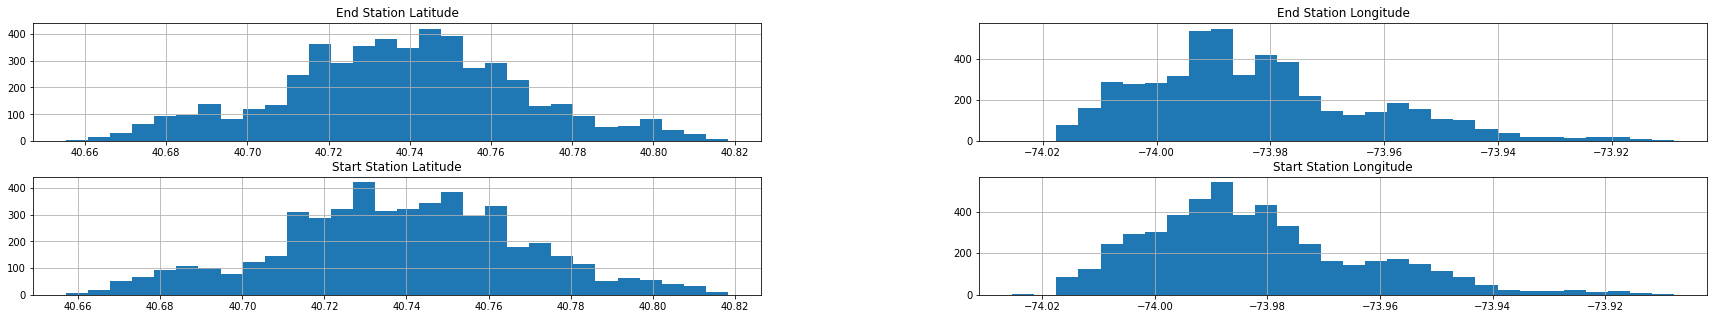

In [94]:
_ = df_oct2019.hist(column=['Start Station Latitude', 'Start Station Longitude', 'End Station Latitude', 'End Station Longitude'], figsize=(30,5), bins=30, log=False)

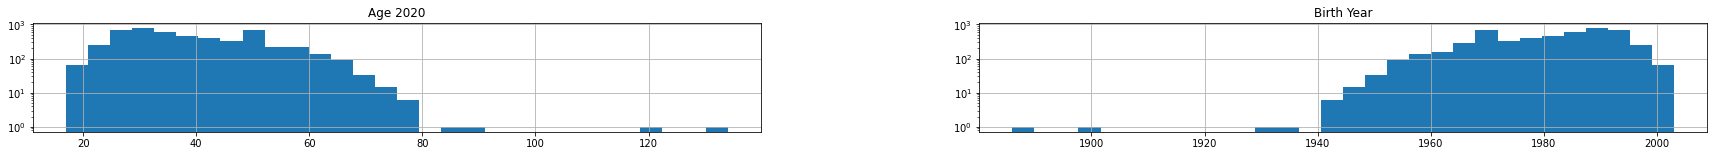

In [22]:
# quasi-stetig
_ = df_oct2019.hist(column=['Birth Year', 'Age 2020'], figsize=(30,2), bins=30, log=True)

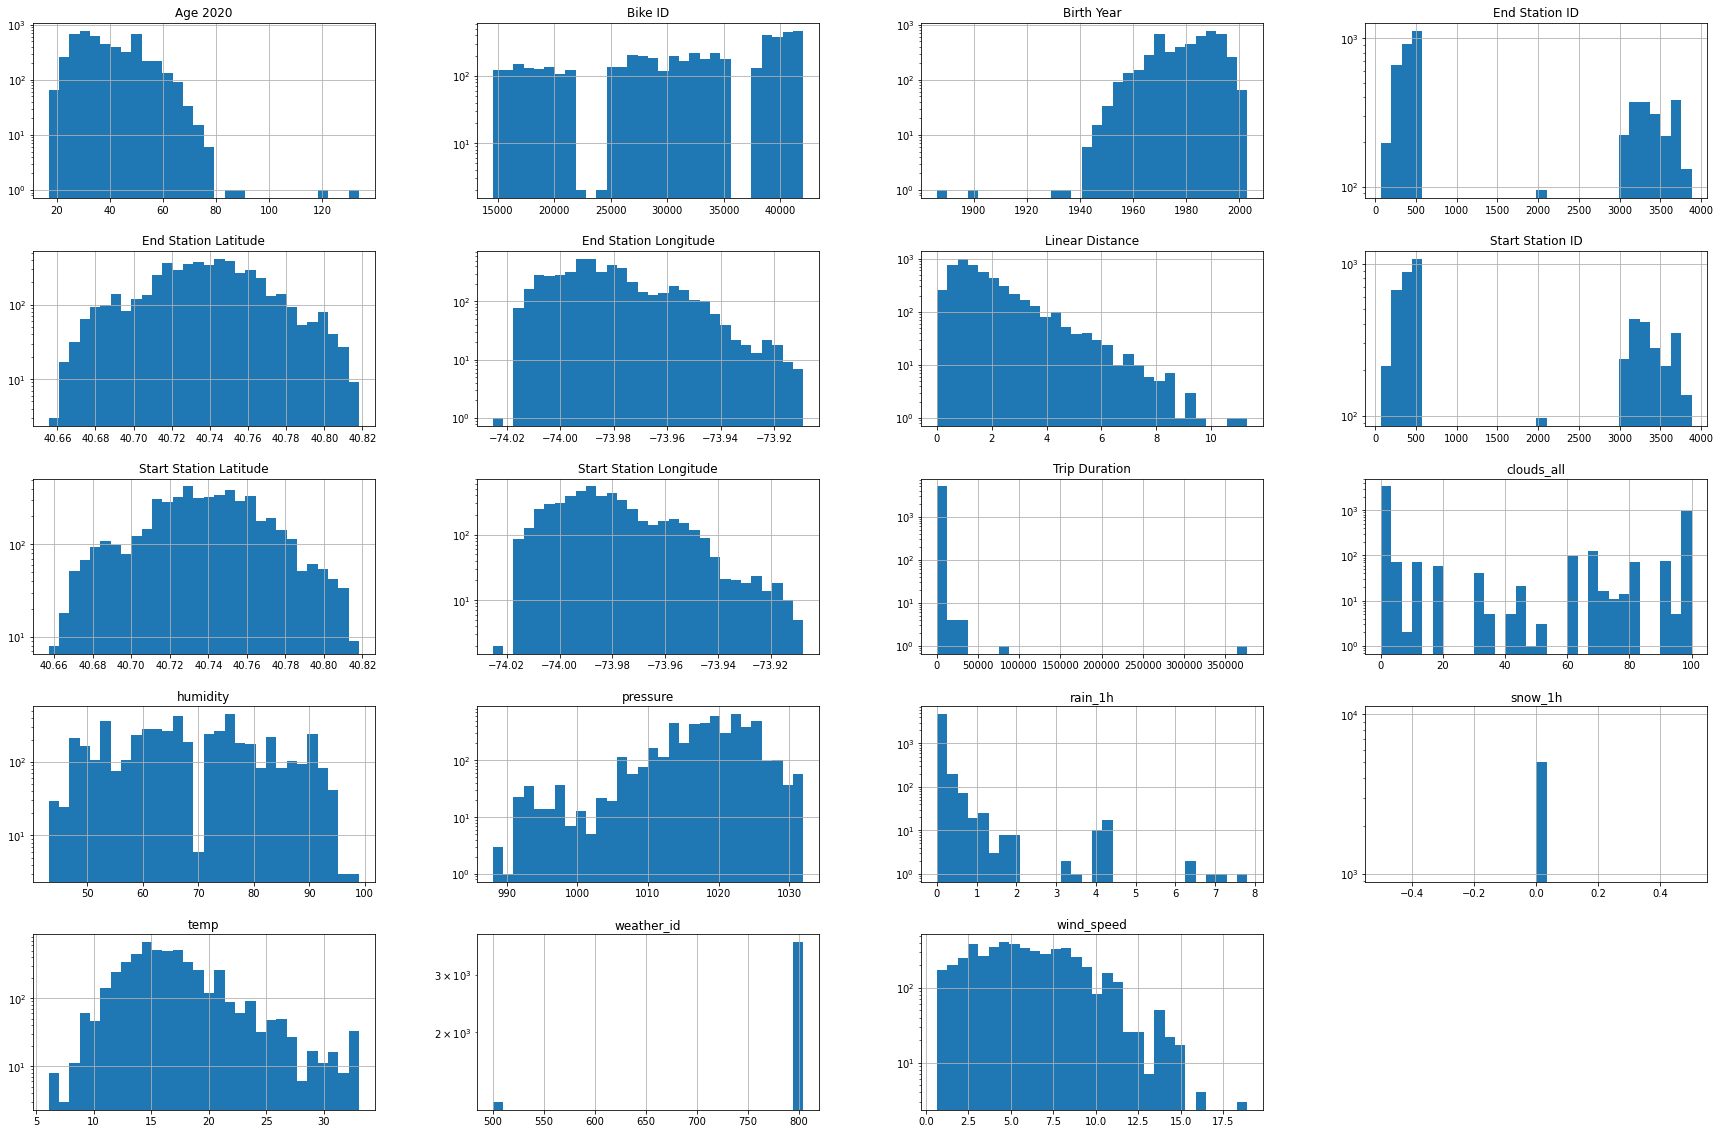

In [45]:
_ = df_oct2019.hist(figsize=(30,20), bins=30, log=True)

In [7]:
df_oct2019.skew()

dt_utc                     0.04997
Trip Duration             62.24698
Start Time                 0.04997
Stop Time                  0.05014
Start Station ID           0.33024
Start Station Latitude    -0.07971
Start Station Longitude    0.79163
End Station ID             0.37894
End Station Latitude      -0.03552
End Station Longitude      0.78465
Bike ID                   -0.48346
Birth Year                -0.61146
Gender                     0.07628
Linear Distance            1.86356
Age 2020                   0.61146
temp                       1.14378
pressure                  -1.21068
humidity                   0.13526
wind_speed                 0.44530
rain_1h                    9.92870
snow_1h                    0.00000
clouds_all                 1.06425
weather_id                -1.18577
dtype: float64

In [8]:
df_oct2019.kurt()

dt_utc                      -1.22489
Trip Duration             4156.34407
Start Time                  -1.22489
Stop Time                   -1.22501
Start Station ID            -1.81327
Start Station Latitude      -0.17752
Start Station Longitude      0.55638
End Station ID              -1.78032
End Station Latitude        -0.14341
End Station Longitude        0.43759
Bike ID                     -0.99737
Birth Year                   0.47641
Gender                      -0.01853
Linear Distance              4.70580
Age 2020                     0.47641
temp                         2.33898
pressure                     2.52941
humidity                    -0.86299
wind_speed                  -0.14157
rain_1h                    120.06672
snow_1h                      0.00000
clouds_all                  -0.74758
weather_id                  -0.59354
dtype: float64

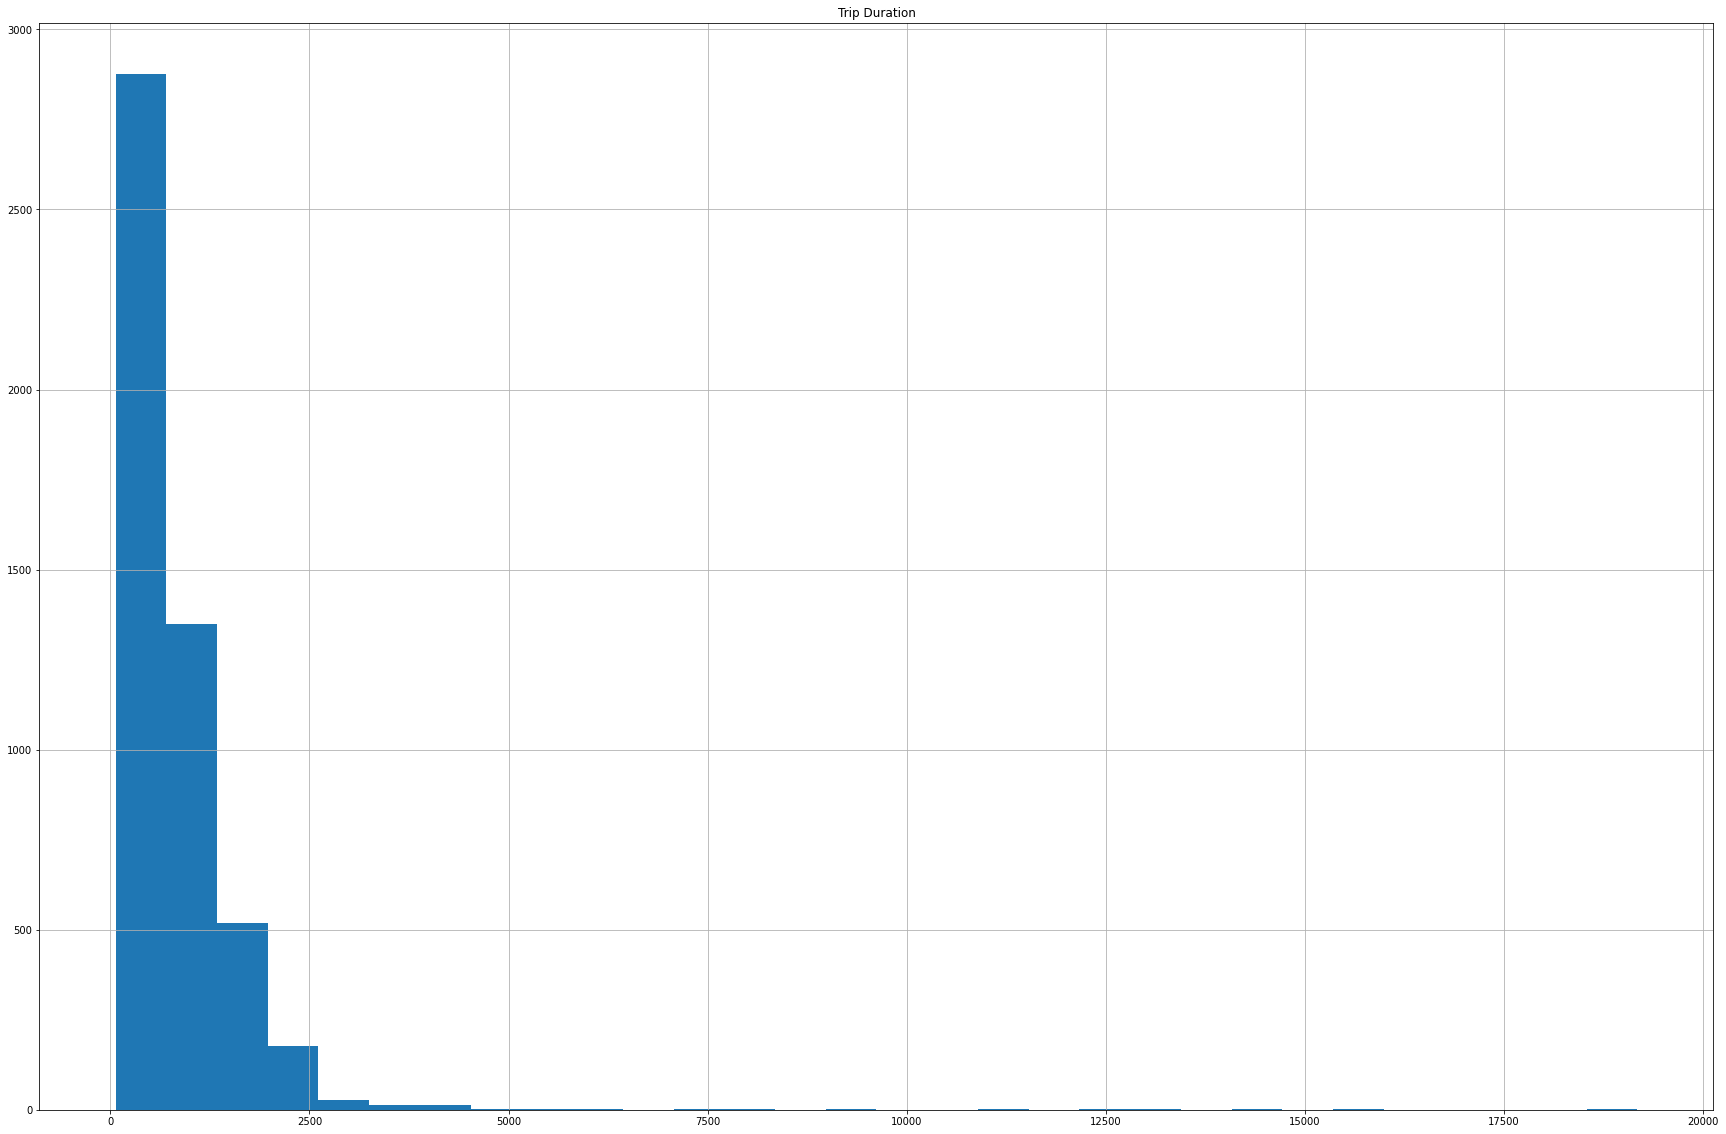

In [72]:
_ = df_oct2019[df_oct2019['Trip Duration'] < 1*60*60*6].hist(column='Trip Duration', figsize=(30,20), bins=30, log=False)

In [ ]:
##### NEXT ANALYSIS ###

# Analyse ```summary-daily-subscribers_only-citibike-tripweather.parquet```

## Merkmale

In [ ]:
df_sumsubs = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

In [ ]:
df_sumsubs.tail().T

| Statistische Einheit | Merkmal                    | Skalenniveau    | Kontinuität | Beschreibung
| ---------------------| ---------------------------| --------------- | ----------- | -------------
| Day                  | **Date**                   | **Intervall**   | diskret     | Datum
| Trip                 | **Trip count**             | **Verhältnis**  | diskret     | Gesamte Anzahl Trips an diesem Tag
| Trip                 | **Trip Duration mean**     | **Verhältnis**  | stetig      | Durchschnittliche Dauer
| Trip                 | **Trip Duration std**      | **Verhältnis**  | stetig      | Standardabweichung der Dauer
| Trip                 | **Trip Duration min**      | **Verhältnis**  | stetig      | Dauer des schnellsten Trips
| Trip                 | **Trip Duration median**   | **Verhältnis**  | stetig      | Median der Dauer
| Trip                 | **Trip Duration max**      | **Verhältnis**  | stetig      | Dauer des längsten Trips
| Trip                 | **Linear Distance mean**   | **Verhältnis**  | stetig      | Durchschnittliche Distanz (Luftlinie zwischen Stationen)
| Trip                 | **Linear Distance std**    | **Verhältnis**  | stetig      | Standardabweichung der Distanz
| Trip                 | **Linear Distance min**    | **Verhältnis**  | stetig      | Distanz des kürzesten Trips
| Trip                 | **Linear Distance median** | **Verhältnis**  | stetig      | Median der Distanz 
| Trip                 | **Linear Distance max**    | **Verhältnis**  | stetig      | Distanz des weitesten Trips
| User                 | **Age 2020 count**         | **Verhältnis**  | diskret     | Gesamte Anzahl angegebener Alter
| User                 | **Age 2020 mean**          | **Verhältnis**  | stetig      | Durchschnittliches Alter
| User                 | **Age 2020 std**           | **Verhältnis**  | diskret     | Standardabweichung des Alters
| User                 | **Age 2020 min**           | **Verhältnis**  | diskret     | Jüngstes Alter
| User                 | **Age 2020 median**        | **Verhältnis**  | stetig      | Median des Alters
| User                 | **Age 2020 max**           | **Verhältnis**  | diskret     | Ältestes Alter
| Temperature          | **temp mean**              | **Intervall**   | stetig      | Durchschnittliche Temperatur (°C)
| Temperature          | **temp std**               | **Intervall**   | stetig      | Standardabweichung der Temperatur (°C)
| Temperature          | **temp median**            | **Intervall**   | stetig      | Median der Temperatur (°C)
| Temperature          | **temp min**               | **Intervall**   | stetig      | Tiefste Temperatur (°C)
| Temperature          | **temp max**               | **Intervall**   | stetig      | Höchste Temperatur (°C)
| Wind                 | **wind_speed mean**        | **Verhältnis**  | stetig      | Durchschnittliche Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed std**         | **Verhältnis**  | stetig      | Standardabweichung der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed median**      | **Verhältnis**  | stetig      | Median der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed min**         | **Verhältnis**  | stetig      | Tiefste Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed max**         | **Verhältnis**  | stetig      | Höchste Windgeschwindigkeit (m/s)
| Rainfall             | **rain_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Niederschlag (mm)
| Rainfall             | **rain_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Niederschlag in 1h am Tag (mm)
| Rainfall             | **rain_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Niederschlag in 1h am Tag (mm)
| Snowfall             | **snow_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Schneefall (mm)
| Snowfall             | **snow_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Schneefall in 1h am Tag (mm)
| Snowfall             | **snow_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Schneefall in 1h am Tag (mm)

# Analyse ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```

## Merkmale

In [ ]:
df_sumsubs_bygen = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

In [ ]:
df_sumsubs_bygen.tail().T

Zusätzlich zu den Merkmalen aus ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```, gibt es noch zusätzlich das folgende Merkmal:

| Statistische Einheit | Merkmal                    | Skalenniveau   | Beschreibung
| ---------------------| ---------------------------| ---------------| -------------
| User                 | **Gender**                 | **Nominal**    | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_ 

# OLD!!!!

## Analyse

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
%matplotlib inline

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
path = './../data/citibike/tripdata'

### Tripweather Oktober 2019

In [ ]:
tripweather = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

In [ ]:
tripweather.head()

In [ ]:
tripweather.info()

In [ ]:
tripweather.shape

In [ ]:
tripweather.isna().sum().sum()

In [ ]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

In [ ]:
%%time
numeric_columns = filter_numeric_columns(tripweather)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Samples per Day

In [ ]:
tripweather_samples_per_day = pd.read_parquet(os.path.join(path, 'samples_per_day-citibike-tripweather.parquet'))

In [ ]:
tripweather_samples_per_day.shape

In [ ]:
tripweather_samples_per_day.isna().sum()

In [ ]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

In [ ]:
%%time
numeric_columns = filter_numeric_columns(tripweather_samples_per_day)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_samples_per_day[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_samples_per_day[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Samples per Month

In [ ]:
tripweather_samples_per_month = pd.read_parquet(os.path.join(path, 'samples_per_month-citibike-tripweather.parquet'))

In [ ]:
tripweather_samples_per_month.shape

In [ ]:
tripweather_samples_per_month.isna().sum()

In [ ]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

In [ ]:
%%time
numeric_columns = filter_numeric_columns(tripweather_samples_per_month)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_samples_per_month[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_samples_per_month[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Daily Summary, Subscribers only

In [ ]:
tripweather_summary = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

In [ ]:
tripweather_summary.head()

In [ ]:
tripweather_summary.info()

In [ ]:
tripweather_summary.shape

In [ ]:
tripweather_summary.isna().sum().sum()

In [ ]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

In [ ]:
%%time
numeric_columns = filter_numeric_columns(tripweather_summary)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_summary[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_summary[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Daily Summary, Subscribers only, Grouped by Gender

In [ ]:
tripweather_summary_grouped = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

In [ ]:
tripweather_summary_grouped.head()

In [ ]:
tripweather_summary_grouped.info()

In [ ]:
tripweather_summary_grouped.shape

In [ ]:
tripweather_summary_grouped.isna().sum().sum()

In [ ]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

In [ ]:
%%time
numeric_columns = filter_numeric_columns(tripweather_summary_grouped)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_summary_grouped[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_summary_grouped[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()